# Non-$n$-Locality Robustness to Colored Noise on Sources

In [11]:
import qnetvo as qnet
from context import src

import matplotlib.pyplot as plt
from pennylane import numpy as np

num_samples = 21

In [12]:
chsh_colored_dir = "../data/chsh/source_colored_noise/"

chsh_colored_regexes = [
    r"arb_local_rot_.*",
    r"max_ent_local_rot_.*",
    r"phi_plus_local_rot_.*",
    r"phi_plus_local_ry_.*",
    r"psi_plus_local_ry_.*",
]

chsh_colored_data = [
    src.analyze_data_one_param_scan(
        src.get_data_files(chsh_colored_dir, regex)
    )
    for regex in chsh_colored_regexes
]

max_chsh_colored = [
    max(map(lambda opt_data: opt_data["max_scores"][i], chsh_colored_data))
    for i in range(num_samples)
]

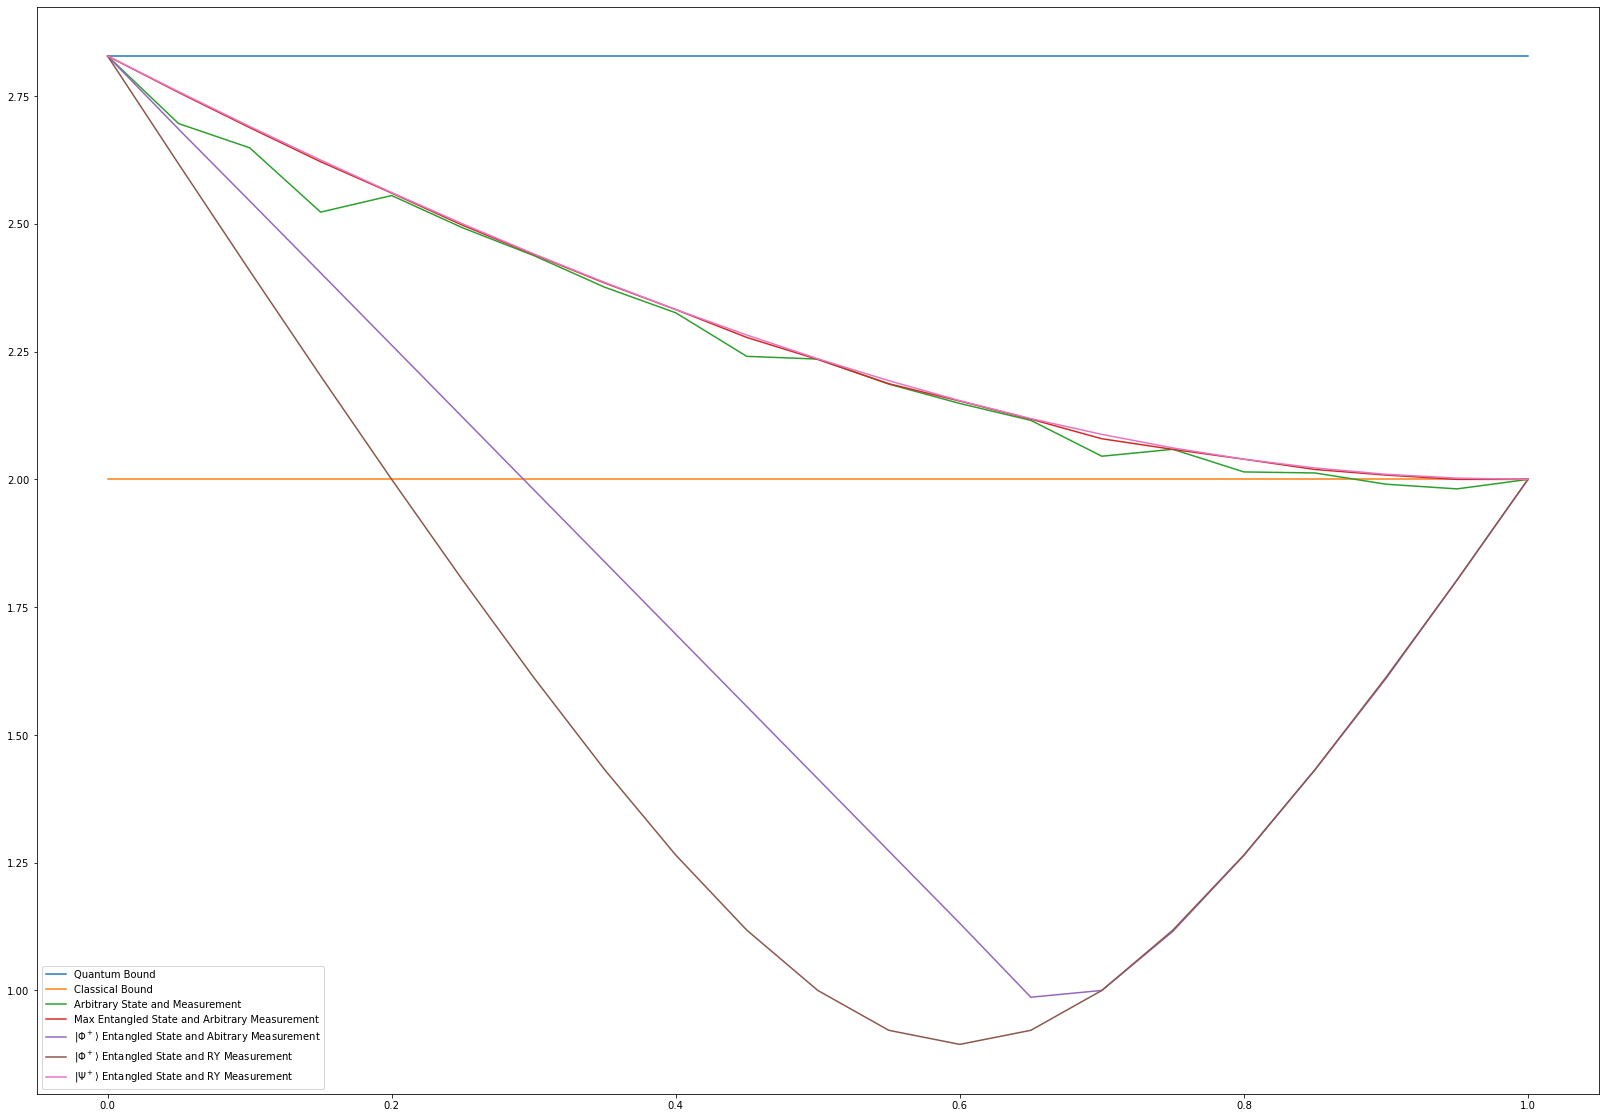

In [21]:
noise_params = chsh_colored_data[0]["noise_params"]

fig, ax = plt.subplots(1, 1, figsize=(28,20))

plt.plot(noise_params, [2*np.sqrt(2)]*num_samples, label="Quantum Bound")
plt.plot(noise_params, [2]*num_samples, label="Classical Bound")

chsh_colored_labels = [
    "Arbitrary State and Measurement",
    "Max Entangled State and Arbitrary Measurement",
    r"$|\Phi^+\rangle$ Entangled State and Abitrary Measurement",
    r"$|\Phi^+\rangle$ Entangled State and RY Measurement",
    r"$|\Psi^+\rangle$ Entangled State and RY Measurement",
]

for i in range(5):
    plt.plot(noise_params, chsh_colored_data[i]["max_scores"], label=chsh_colored_labels[i])

plt.legend()